# Programming task 10: Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exporting the results to PDF
Once you complete the assignments, export the entire notebook as PDF and attach it to your homework solutions. 
The best way of doing that is
1. Run all the cells of the notebook.
2. Export/download the notebook as PDF (File -> Download as -> PDF via LaTeX (.pdf)).
3. Concatenate your solutions for other tasks with the output of Step 2. On a Linux machine you can simply use `pdfunite`, there are similar tools for other platforms too. You can only upload a single PDF file to Moodle.

Make sure you are using `nbconvert` Version 5.5 or later by running `jupyter nbconvert --version`. Older versions clip lines that exceed page width, which makes your code harder to grade.

##  PCA

Given the data in the matrix X your tasks is to:
* Calculate the covariance matrix $\Sigma$.
* Calculate eigenvalues and eigenvectors of $\Sigma$.
* Plot the original data $X$ and the eigenvectors to a single diagram. What do you observe? Which eigenvector corresponds to the smallest eigenvalue?
* Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace.
* Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.	

### The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

### Task 1: Calculate the covariance matrix $\Sigma$

In [3]:
def get_covariance(X):
    """Calculates the covariance matrix of the input data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
        
    Returns
    -------
    Sigma : array, shape [D, D]
        Covariance matrix
        
    """
    # TODO
    N = X.shape[0]
    N_ones = np.ones(N)
    x_mean = (1/N) * (X.T @ N_ones)
    cov_X = (1/N)* (X.T@X) - x_mean @ x_mean.T
    print("x_mean",x_mean)
    
    return cov_X

### Task 2: Calculate eigenvalues and eigenvectors of  $\Sigma$.

In [4]:
def get_eigen(S):
    """Calculates the eigenvalues and eigenvectors of the input matrix.
    
    Parameters
    ----------
    S : array, shape [D, D]
        Square symmetric positive definite matrix.
        
    Returns
    -------
    L : array, shape [D]
        Eigenvalues of S
    U : array, shape [D, D]
        Eigenvectors of S
    
    """
    # TODO
    L, U = np.linalg.eig(S)
    
    return L, U

### Task 3: Plot the original data X and the eigenvectors to a single diagram.

Note that, in general if $u_i$ is an eigenvector of the matrix $M$ with eigenvalue $\lambda_i$ then $\alpha \cdot u_i$ is also an eigenvector of $M$ with the same eigenvalue $\lambda_i$, where $\alpha$ is an arbitrary scalar (including $\alpha=-1$). 

Thus, the signs of the eigenvectors are arbitrary, and you can flip them without changing the meaning of the result. Only their direction matters. The particular result depends on the algorithm used to find them. 

x_mean [0. 0.]


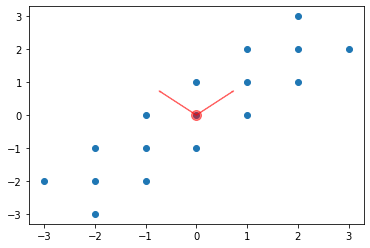

In [5]:
# plot the original data
plt.scatter(X[:, 0], X[:, 1])  #绘制散点图

# plot the mean of the data
mean_d1, mean_d2 = X.mean(0)
plt.plot(mean_d1, mean_d2, 'o', markersize=10, color='red', alpha=0.5)

# calculate the covariance matrix
Sigma = get_covariance(X)
# calculate the eigenvector and eigenvalues of Sigma
L, U = get_eigen(Sigma)
n_max = np.where(L == np.max(L,axis=0))

plt.arrow(mean_d1, mean_d2, U[0, 0], U[1, 0], width=0.01, color='red', alpha=0.5)
plt.arrow(mean_d1, mean_d2, U[0, 1], U[1, 1], width=0.01, color='red', alpha=0.5)

What do you observe in the above plot? Which eigenvector corresponds to the smallest eigenvalue?

Write your answer here:

[YOUR ANSWER]

The variances of X are very different in the two directions of eigenvector. The variance is very large in the direction of the first eigenvector (U[0, 0], U[1, 0]) and is very small in the direction of the second eigenvector(U[0, 1], U[1, 1]). Which means the second eigenvector corresponds to the smallest eigenvalue.

### Task 4: Transform the data

Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.

In [6]:
def transform(X, U, L):
    """Transforms the data in the new subspace spanned by the eigenvector corresponding to the largest eigenvalue.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
    L : array, shape [D]
        Eigenvalues of Sigma_X
    U : array, shape [D, D]
        Eigenvectors of Sigma_X
        
    Returns
    -------
    X_t : array, shape [N, 1]
        Transformed data
        
    """
    # TODO
    val_max = np.where(L == np.max(L,axis=0))
    vec_max = U[:,n_max].reshape(2,1)
    X_t = X @ vec_max
    
    return X_t

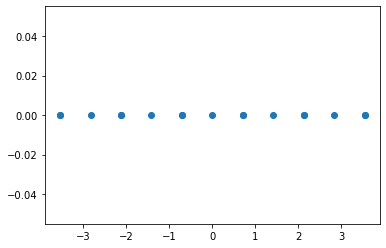

In [7]:
X_t = transform(X, U, L)
N = len(X_t)
Y_t = np.zeros(N)
plt.scatter(X_t, Y_t)

##  SVD

### Task 5: Given the matrix $M$ find its SVD decomposition $M= U \cdot \Sigma \cdot V$ and reduce it to one dimension using the approach described in the lecture.

In [8]:
M = np.array([[1, 2], [6, 3],[0, 2]])

In [17]:
def reduce_to_one_dimension(M):
    """Reduces the input matrix to one dimension using its SVD decomposition.
    
    Parameters
    ----------
    M : array, shape [N, D]
        Input matrix.
        
    Returns
    -------
    M_t: array, shape [N, 1]
        Reduce matrix.
    
    """
    # TODO
    #get u, a,vh
    u, s, vh = np.linalg.svd(M, full_matrices=False)
    print("u shape", u.shape)
    print("u",u)
    print("vh",vh)
    
    #dim. reduction
    val_max = np.where(s == np.max(s))
    s_max = s[val_max]
    u_max = u[:,val_max].reshape(-1,1)
    vh_max = vh[val_max,:].reshape(1,-1)
    
    #approximation
    M_t = (u_max@vh_max)*s_max
    return M_t 

In [18]:
M_t = reduce_to_one_dimension(M)
print(M)
print(M_t)

u shape (3, 2)
u [[-0.27073584  0.54578489]
 [-0.95094914 -0.27969357]
 [-0.14965909  0.78986731]]
vh [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]
[[1 2]
 [6 3]
 [0 2]]
[[1.61803399 1.        ]
 [5.68328157 3.51246118]
 [0.89442719 0.5527864 ]]
